#  <span style='color:midnightblue'>  Hierarchical Cluster Analysis


##  <span style='color:royalblue'>  1. Load required libraries </span>

In [20]:
library(tidyverse) 
library(cluster)    
library(factoextra)
library(dendextend)
library(Rtsne) 

##  <span style='color:royalblue'>  2. Load dataset </span>

In [2]:
df <- USArrests
head(df,5)

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


##  <span style='color:royalblue'>  3. Data cleaning </span>

In [3]:
df <- na.omit(df) #Remove missing values  
df <- scale(df) #Scale/standardize the data
df <- as.data.frame(df)
head(df,5)

,Murder,Assault,UrbanPop,Rape
Alabama,1.24256408,0.7828393,-0.5209066,-0.003416473
Alaska,0.50786248,1.1068225,-1.2117642,2.484202941
Arizona,0.07163341,1.4788032,0.9989801,1.042878388
Arkansas,0.23234938,0.2308680,-1.0735927,-0.184916602
California,0.27826823,1.2628144,1.7589234,2.067820292


##  <span style='color:royalblue'>  4. Hierarchical Clustering Algorithms </span>
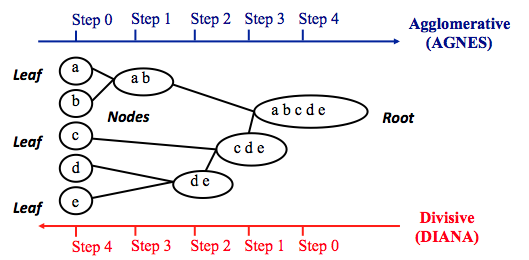

###  <span style='color:royalblue'>  4.1. Agglomerative clustering (AGNES) </span>
Bottom-up approach. Each object is initially considered as a single-element cluster (leaf). At each step of the algorithm, the two clusters that are the most similar are combined into a new bigger cluster (nodes)<br><br>Other dissimilarity calculation methods include “complete”, “average”, “single”, “ward.D”

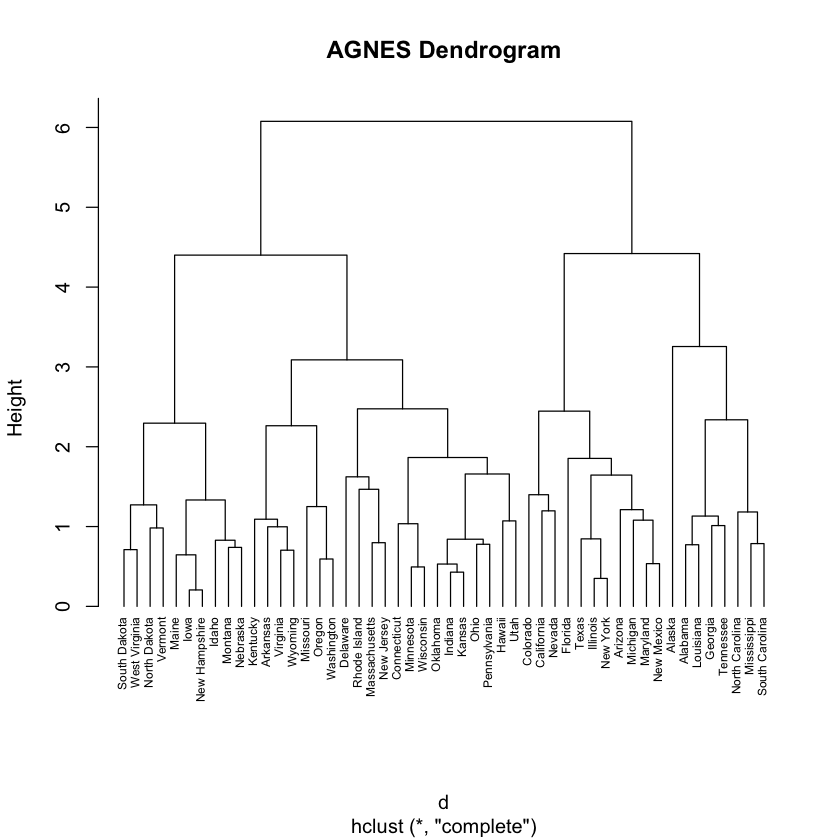

In [4]:
# Dissimilarity matrix
d <- dist(df, method = "euclidean")

# Hierarchical clustering using Complete Linkage
hc1 <- hclust(d, method = "complete" )

# Plot the obtained dendrogram
plot(hc1, cex = 0.6, hang = -1, main = "AGNES Dendrogram")

###  <span style='color:royalblue'>  4.2. Divisive hierarchical clustering (DIANA) </span>
Top-down approach. The algorithm is an inverse order of AGNES. It begins with the root, in which all objects are included in a single cluster. At each step of iteration, the most heterogeneous cluster is divided into two. 

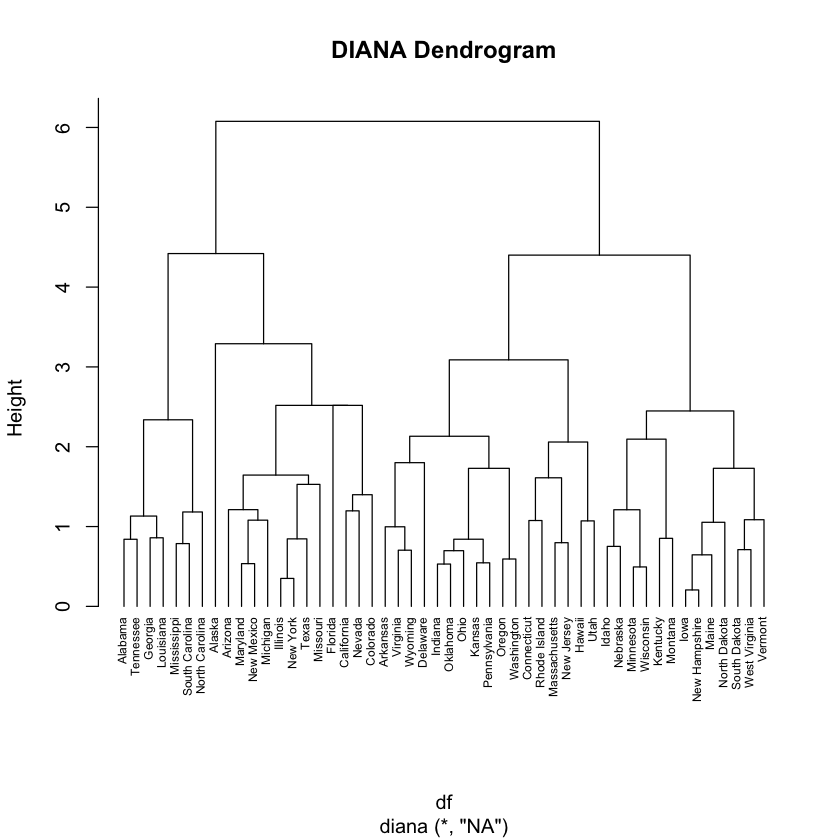

In [5]:
# compute divisive hierarchical clustering
hc4 <- diana(df)

# plot dendrogram
pltree(hc4, cex = 0.6, hang = -1, main = "DIANA Dendrogram")

##  <span style='color:royalblue'>  5. Optimal number of cluters </span>

###  <span style='color:royalblue'>  5.1 Elbow method </span>

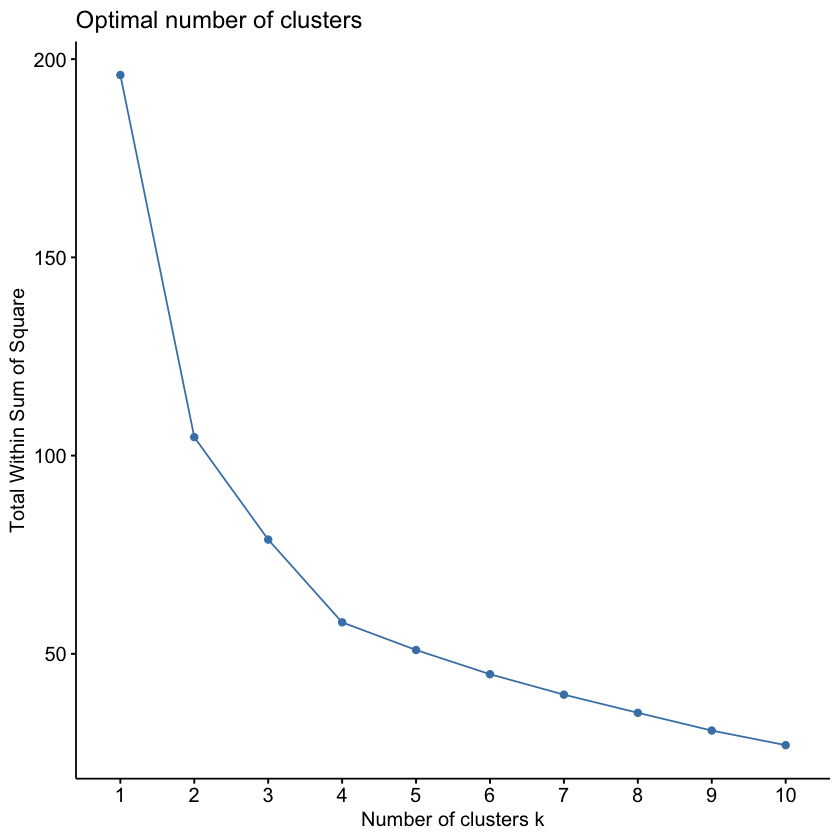

In [6]:
fviz_nbclust(df, FUN = hcut, method = "wss")

###  <span style='color:royalblue'>  5.2 Silhouette method </span>

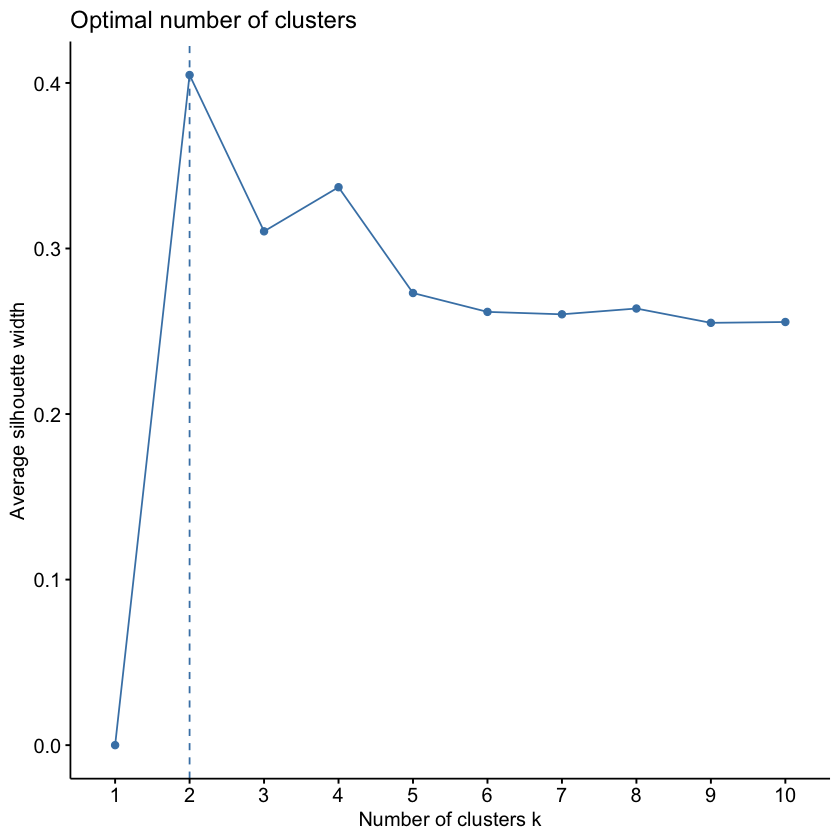

In [7]:
fviz_nbclust(df, FUN = hcut, method = "silhouette")

###  <span style='color:royalblue'>  5.3 Gap Statistic Method </span>

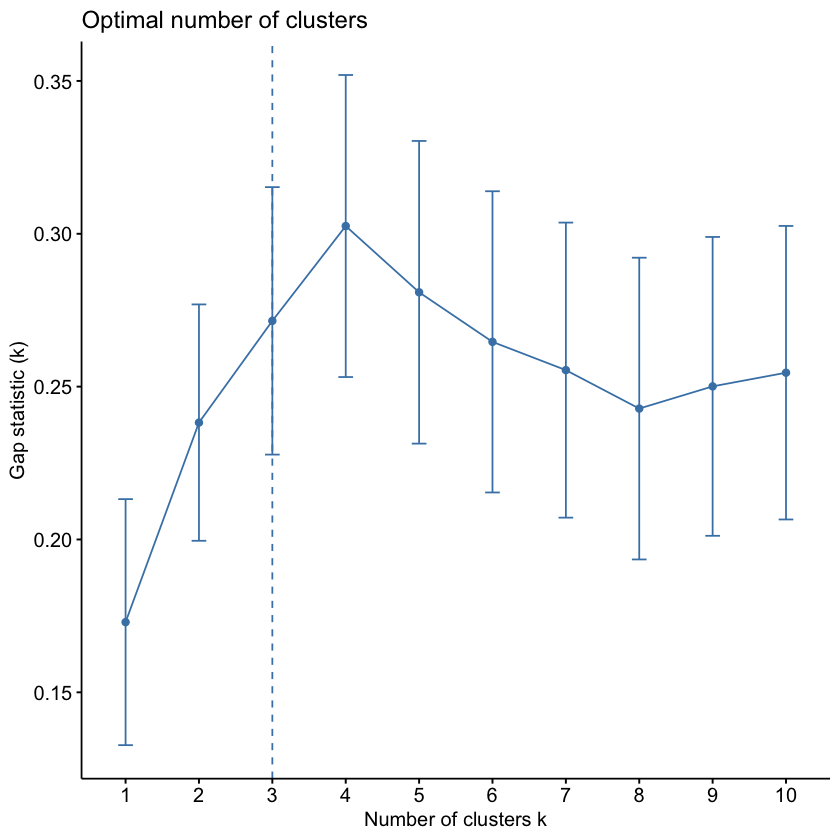

In [8]:
gap_stat <- clusGap(df, FUN = hcut, nstart = 25, K.max = 10, B = 50)
fviz_gap_stat(gap_stat)

##  <span style='color:royalblue'>  6. Deploying clustering algorithm with 4 clusters </span>

**Ward’s minimum variance method:** It minimizes the total within-cluster variance. At each step the pair of clusters with minimum between-cluster distance are merged.

In [9]:
# Ward's method
hc5 <- hclust(d, method = "ward.D2" )

# Cut tree into 4 groups
sub_grp <- cutree(hc5, k = 4)

# Number of members in each cluster
table(sub_grp)

sub_grp
 1  2  3  4 
 7 12 19 12 

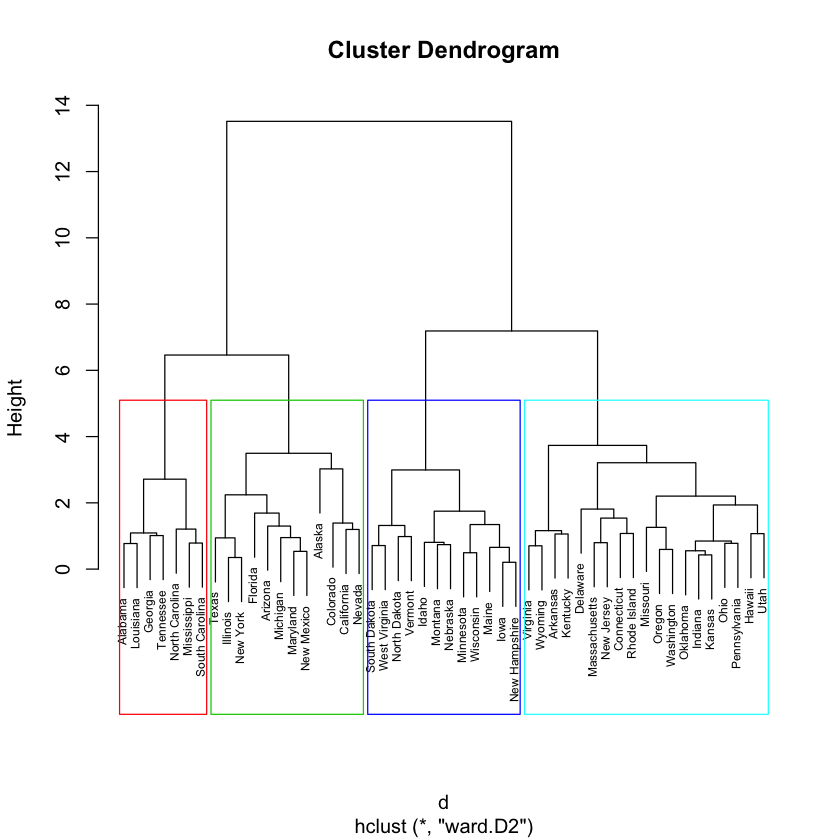

In [10]:
plot(hc5, cex = 0.6)
rect.hclust(hc5, k = 4, border = 2:5)

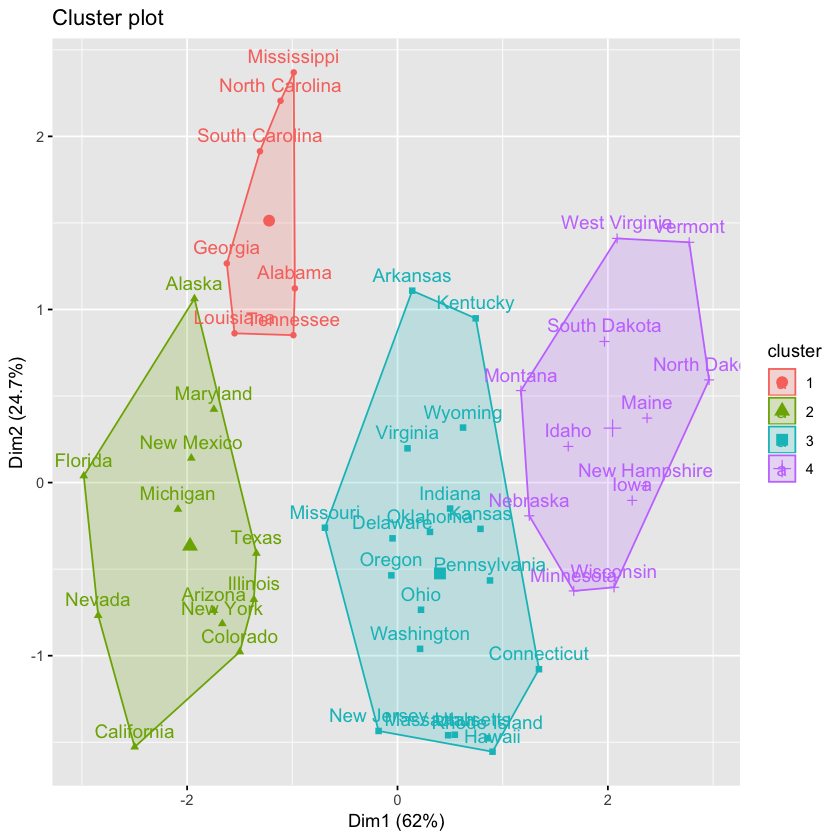

In [11]:
fviz_cluster(list(data = df, cluster = sub_grp))

##  <span style='color:royalblue'>  7. Cluster Interpretation </span>

In [12]:
#convert sub_grp to dataframe
sub_grp_df <- as.data.frame(sub_grp)
colnames(sub_grp_df)[1] <- "cluster"

#bind the cluster with the original dataset
dd <- cbind(df, cluster = sub_grp_df$cluster)
dd <- as.data.frame(dd)

In [13]:
results <- USArrests %>%
  mutate(cluster = dd$cluster) %>%
  group_by(cluster) %>%
  do(the_summary = summary(.))

results$the_summary

[[1]]
     Murder         Assault         UrbanPop          Rape          cluster 
 Min.   :13.00   Min.   :188.0   Min.   :44.00   Min.   :16.10   Min.   :1  
 1st Qu.:13.20   1st Qu.:223.5   1st Qu.:46.50   1st Qu.:19.15   1st Qu.:1  
 Median :14.40   Median :249.0   Median :58.00   Median :22.20   Median :1  
 Mean   :14.67   Mean   :251.3   Mean   :54.29   Mean   :21.69   Mean   :1  
 3rd Qu.:15.75   3rd Qu.:269.0   3rd Qu.:59.50   3rd Qu.:24.15   3rd Qu.:1  
 Max.   :17.40   Max.   :337.0   Max.   :66.00   Max.   :26.90   Max.   :1  

[[2]]
     Murder         Assault         UrbanPop         Rape          cluster 
 Min.   : 7.90   Min.   :201.0   Min.   :48.0   Min.   :24.00   Min.   :2  
 1st Qu.: 9.75   1st Qu.:251.2   1st Qu.:73.0   1st Qu.:27.38   1st Qu.:2  
 Median :11.20   Median :259.0   Median :80.0   Median :32.00   Median :2  
 Mean   :10.97   Mean   :264.0   Mean   :76.5   Mean   :33.61   Mean   :2  
 3rd Qu.:12.12   3rd Qu.:287.2   3rd Qu.:81.5   3rd Qu.:39.17   3rd 

In [14]:
dd <- dd[order(-dd$Murder),]

- **Cluster 1: High crime, low urban population**

In [15]:
#Top 5 states in cluster 1 by murder rate
top_c1 <- dd[dd$cluster == 1, ]
head(top_c1,5)

,Murder,Assault,UrbanPop,Rape,cluster
Georgia,2.206860,0.4828549,-0.38273510,0.487701523,1
Mississippi,1.908387,1.0588250,-1.48810723,-0.441152078,1
Louisiana,1.747671,0.9388312,0.03177945,0.103348309,1
South Carolina,1.518077,1.2988126,-1.21176419,0.135377743,1
Alabama,1.242564,0.7828393,-0.52090661,-0.003416473,1


- **Cluster 2: High crime, high urban population*** 

In [16]:
#Top 5 states in cluster 2 by murder rate
top_c2 <- dd[dd$cluster == 2, ]
head(top_c2,5)

,Murder,Assault,UrbanPop,Rape,cluster
Florida,1.7476714,1.9707777,0.9989801,1.1389667,2
Texas,1.1277670,0.3628612,0.9989801,0.4556721,2
Nevada,1.0129698,0.9748294,1.0680658,2.6443501,2
Michigan,0.9900104,1.0108275,0.5844655,1.4806140,2
New Mexico,0.8292944,1.3708088,0.3081225,1.1603196,2


- **Cluster 3: Low crime, high urban population*** 

In [17]:
#Top 5 states in cluster 3 by murder rate
top_c3 <- dd[dd$cluster == 3, ]
head(top_c3,5)

,Murder,Assault,UrbanPop,Rape,cluster
Kentucky,0.43898421,-0.74108152,-0.9354212,-0.52656390,3
Missouri,0.27826823,0.08687549,0.3081225,0.74393700,3
Arkansas,0.23234938,0.23086801,-1.0735927,-0.18491660,3
Virginia,0.16347111,-0.17711080,-0.1754778,-0.05679886,3
New Jersey,-0.08908257,-0.14111267,1.6207519,-0.25965195,3


- **Cluster 4: Low crime, low urban population***

In [18]:
#Top 5 states in cluster 4 by murder rate
top_c4 <- dd[dd$cluster == 4, ]
head(top_c4,5)

,Murder,Assault,UrbanPop,Rape,cluster
Montana,-0.4105145,-0.7410815,-0.86633540,-0.5158874,4
West Virginia,-0.4793928,-1.0770641,-1.83353601,-1.2739174,4
Nebraska,-0.8008247,-0.8250772,-0.24456358,-0.5052109,4
South Dakota,-0.9156219,-1.0170672,-1.41902147,-0.9002406,4
Minnesota,-1.1681755,-1.1850585,0.03177945,-0.6760346,4
